#**5.1  Surprise 기본 활용 방법**

In [1]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630078 sha256=bee635f93b1f19a70ea71916d8c21ced14b0aaabe20c60242595a18d73594001
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from surprise.prediction_algorithms.knns import KNNWithMeans
import numpy as np

from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

#데이터 불러오기 
data = Dataset.load_builtin(name=u'ml-100k', prompt=False) 

#train test 분리 
trainset, testset = train_test_split(data, test_size=0.25)

#알고리즘 사용 
algo = KNNWithMeans()
algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9523


0.9522565993256621

#**5.2 알고리즘 비교**

Estimating biases using als...
RMSE: 0.9446
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9535
RMSE: 0.9374
RMSE: 0.9240


array([0.92397169, 0.93743526, 0.94460681, 0.95350135])

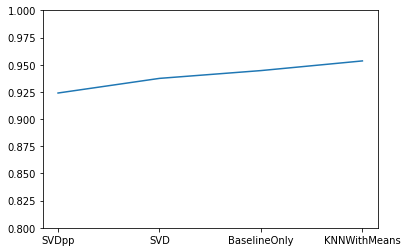

In [3]:
#비교에 필요한 Surprise 알고리즘 
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp 

#정확도 측정 관련 모듈을 가져온다.
from surprise import accuracy

#Dataset 관련 모듈을 가져온다.
from surprise import Dataset

#trian/test set분리 관련 모듈을 가져온다.
from surprise.model_selection import train_test_split

#결과를 그래프로 표시하기 위한 라이브러리 
import matplotlib.pyplot as plt

#MovieLens 100K 데이터 불러오기 
data = Dataset.load_builtin(name=u'ml-100k', prompt=False) 

#Train/Test 0.75 : 0.25로 분리 
trainset, testset = train_test_split(data, test_size=0.25)

algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]

names = []
results = []

for option in algorithms: 
  algo = option() 
  names.append(option.__name__)
  #print(names)  ['BaselineOnly'] ['BaselineOnly', 'KNNWithMeans'] ...
  algo.fit(trainset)
  predictions = algo.test(testset)
  results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

#rmse가 작은 순서대로 index 추출
index = np.argsort(results)
plt.ylim(0.8,1)
plt.plot(names[index], results[index])
results[index]

#**5.3 알고리즘 옵션 지정**

In [4]:
sim_options = {'name' : 'pearson_baseline',
               'user_based' : True} #name : 유사도지표, user_based = False : item based
algo = KNNWithMeans(K=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427


0.9427484841516884

#**5.4 다양한 조건의 비교**

In [5]:
#집단과 사용자의 평가경향을 함께 고려한 CF 알고리즘
from surprise import KNNWithMeans

#정확도 측정 관련 모듈을 가져온다.
from surprise import accuracy

#Dataset 관련 모듈을 가져온다.
from surprise import Dataset

#trian/test set분리 관련 모듈을 가져온다.
from surprise.model_selection import train_test_split

#MovieLens 100K 데이터 불러오기 
data = Dataset.load_builtin(name=u'ml-100k', prompt=False) 

#Train/Test 0.75 : 0.25로 분리 
trainset, testset = train_test_split(data, test_size=0.25)

result = []

for neighbor_size in (10,20,30,40,50,60): 
  algo = KNNWithMeans(k = neighbor_size, 
                      sim_options = {'name':'pearson_baseline',
                                     'user_based' : True})
  algo.fit(trainset)
  predcitions = algo.test(testset)
  result.append([neighbor_size, accuracy.rmse(predictions)])

result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9427


[[10, 0.9427484841516884],
 [20, 0.9427484841516884],
 [30, 0.9427484841516884],
 [40, 0.9427484841516884],
 [50, 0.9427484841516884],
 [60, 0.9427484841516884]]

In [6]:
#KNN 다양한 파리미터 비교 
#Grid Serach를 위한 모듈 가져오기 
from surprise.model_selection import GridSearchCV 

param_grid = {
    'k' : [5,10,15,25],
    'sim_options' : {
        'name' : ['pearson_baseline','cosine'],
        'user_based' : [True, False]
    }
}

gs = GridSearchCV(KNNWithMeans,
                  param_grid,
                  measures = ['rmse'],
                  cv= 4)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [8]:
#최적 RMSE 출력
print(gs.best_score['results'])
#최적 RMSE의 parameter 출력
print(gs.best_params['rmse'])

KeyError: ignored

In [ ]:
#SVD 다양한 파라미터 비교 
from surprise import SVD 
from surprise.model_selection import GridSearchCV

params_grid = {
    'n_epochs' : [70,80,90],
    'lr_all':[0.005,0.006,0.007], #학습률
    'reg_all' : [0.05,0.07,0.1] #정규화 계수
}

gs = GridSearchCV(SVD, 
                  param_grid = param_grid,
                  measures = ['rmse'],
                  cv=4)

gs.fit(data)

print(gs.beset_score('rmse'))
print(gs.best_parmas['rmse'])

#**5.5 외부 데이터 사용**

In [ ]:
#csv 파일에서 불러오기 
import pandas as pd
#데이터 읽기 관련된 모듈을 가져온다.
from surprise import Reader
#Dataset 관련 모듈을 가져온다. 
from surprise import Dataset 

#DataFrame 형태로 데이터를 읽어온다. 
r_cols = ["user_id","movie_id",'rating','timestamp']
ratings = pd.read_csv('/content/drive/MyDrive/RecoSys/Data/u.data',
                    sep = '\t',
                    names = r_cols,
                    encoding='latin-1')

reader = Reader(rating_scale = (1,5)) #평가척도 설정 
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']],reader)

In [ ]:
data